<a href="https://colab.research.google.com/github/Bibek0130/API-/blob/master/Fertilizer_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary python libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Fertilizer.csv")
df.head(10)

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea
5,12,10,13,Seventeen-Seventeen-Seventeen
6,9,0,10,Twenty-Twenty
7,41,0,0,Urea
8,21,0,18,Twenty Eight-Twenty Eight
9,9,7,30,Fourteen-Thirty Five-Fourteen


In [ ]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [ ]:
#finding how many unique fertilizers we have data on.
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

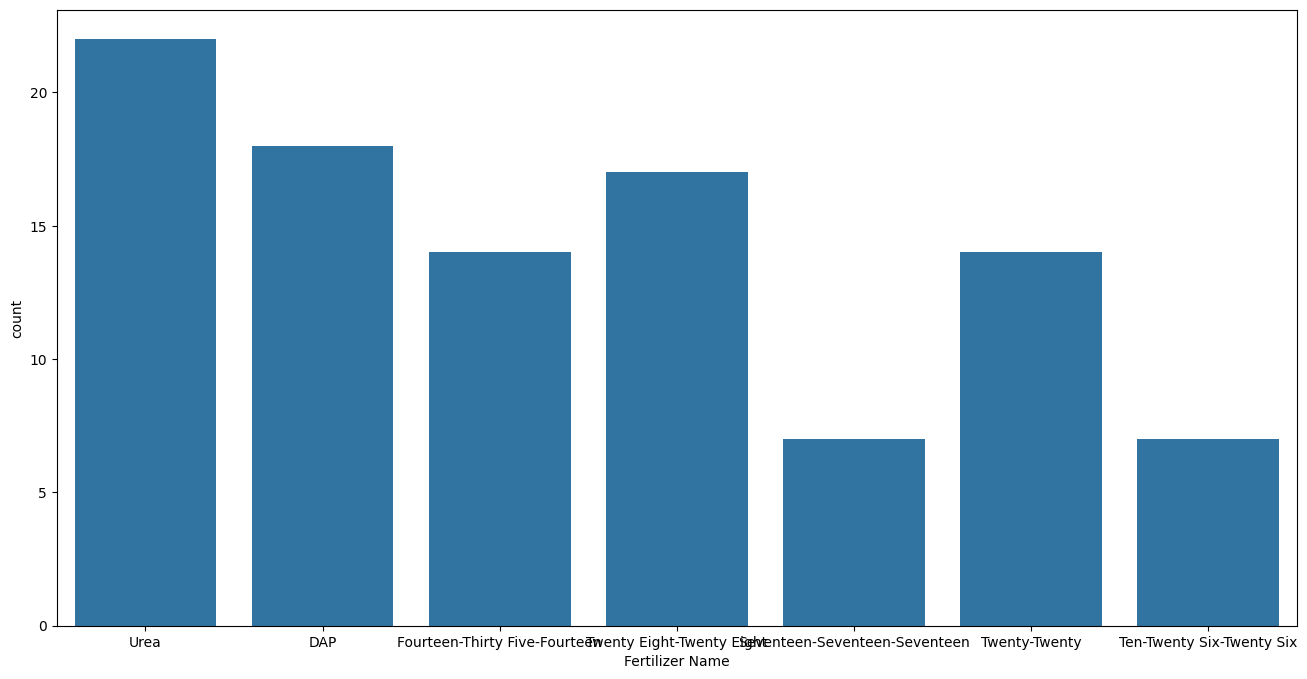

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data=df)

In [ ]:
#creating a input data for the machine learning model.
X = df.drop(columns=['Fertilizer Name'])
#creating a target variable for the model
y = df['Fertilizer Name']

In [ ]:
from sklearn.model_selection import train_test_split
#splits the data into two parts, where 70% of the data will be used for training and 30% will be used for testing purposes.
#random_seed = 42 means that the seed will be reproduciable. Same random_seed number will give same numbers
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
#standard scaler is used to standarize data by removing mean and variance.
scaler = StandardScaler()
#scaler.fit standarizes the by removing mean and dividing them by standard deviation.
#this results in mean being 0 and standard deviation being equal to 1.
X_train = scaler.fit_transform(X_train)
#X_test is standarizes using the same mean and standard defviation calculated from the training data.
#It is crucial to make use of same scaler for both training and testing.
X_test = scaler.transform(X_test)

In [ ]:
#it recieves the first example from the standarized training set.
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

In [13]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier(): This initializes a new Random Forest classifier.
# n_estimators=100: This parameter sets the number of decision trees in the forest to 100. More trees generally improve performance but also increase computation time.
# criterion='gini': This parameter specifies the function to measure the quality of a split. The "gini" index is used to decide how to split nodes.
# random_state=42: This parameter sets the seed for the random number generator, ensuring that the results are reproducible.
classifier = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)
#trains the randodm classifer using training data and its corresponding label.
#During this the classifier learns patterns to make predictions.
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
# is used to test the accuracy of the confuison matrix of test with the predicted label.
cm = confusion_matrix(y_test, y_pred)
#cm variable is used to store the confusion matrix which is usually 2D matrix.
print(cm)
#accuracy score of the test data with the predicted data is done.
accuracy_score(y_test, y_pred)


[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [23]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
0,0
1,1
2,2
3,3
4,4
5,5
6,6
